In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import *
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.vgg16 import preprocess_input


In [ ]:
train_path = '/content/drive/My Drive/Colab Notebooks/Covid/Train'
test_path = '/content/drive/My Drive/Colab Notebooks/Covid/Test'

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_data = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set = train_data.flow_from_directory(train_path, target_size = (224,224),batch_size = 16,class_mode = 'categorical')
test_set = test_data.flow_from_directory(test_path, target_size = (224,224),batch_size = 16,class_mode = 'categorical')

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [ ]:
train_set.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
covid = model.fit(train_set, validation_data=test_set, epochs=8, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/8
16/16 [==============================] - 71s 4s/step - loss: 1.4627 - accuracy: 0.4263 - val_loss: 0.9103 - val_accuracy: 0.6515
Epoch 2/8
16/16 [==============================] - 10s 637ms/step - loss: 0.7423 - accuracy: 0.6813 - val_loss: 0.4282 - val_accuracy: 0.7424
Epoch 3/8
16/16 [==============================] - 8s 529ms/step - loss: 0.5848 - accuracy: 0.7888 - val_loss: 0.5415 - val_accuracy: 0.7424
Epoch 4/8
16/16 [==============================] - 10s 649ms/step - loss: 0.4994 - accuracy: 0.7888 - val_loss: 0.4258 - val_accuracy: 0.7424
Epoch 5/8
16/16 [==============================] - 10s 646ms/step - loss: 0.4181 - accuracy: 0.8406 - val_loss: 0.3616 - val_accuracy: 0.7576
Epoch 6/8
16/16 [==============================] - 9s 539ms/step - loss: 0.4691 - accuracy: 0.7849 - val_loss: 0.5093 - val_accuracy: 0.7424
Epoch 7/8
16/16 [==============================] - 10s 649ms/step - loss: 0.4015 - accuracy: 0.8247 - val_loss: 0.3000 - val_accuracy: 0.9091
Epoch 8/8
1

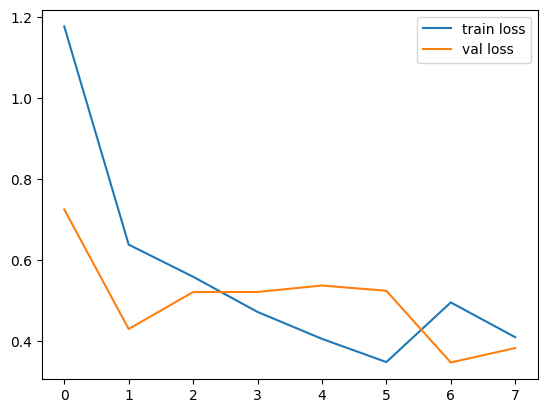

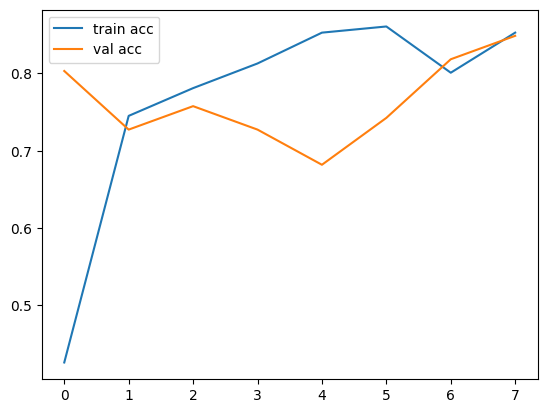

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(covid.history['loss'], label='train loss')
plt.plot(covid.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(covid.history['accuracy'], label='train acc')
plt.plot(covid.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
!pip install pyyaml h5py

In [ ]:
model.save('covid.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
covid = load_model('covid.h5')

In [ ]:
def model_predict(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)

    # Get the index of the maximum value in the prediction array
    predicted_class = np.argmax(preds, axis=1)[0]

    if predicted_class == 0:
        print("Class 0: Positive")
    elif predicted_class == 1:
        print("Class 1: Negative")
    elif predicted_class == 2:
        print("Class 2: Viral Pneumonia")
    else:
        print("Unknown class")

In [ ]:
img_path='/content/drive/MyDrive/covid19/Pneumonia-Viral (1024).jpg'
model=load_model('covid.h5')
model_predict(img_path,model)

1/1 [==============================] - 0s 113ms/step
Class 2: Viral Pneumonia
